# Date and Temperature Application

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('D:\Test\Temperature.csv')

In [3]:
dataset

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8
...,...,...
3645,27-12-1990,14.0
3646,28-12-1990,13.6
3647,29-12-1990,13.5
3648,30-12-1990,15.7


In [4]:
dataset.head(20)

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8
5,06-01-1981,15.8
6,07-01-1981,15.8
7,08-01-1981,17.4
8,09-01-1981,21.8
9,10-01-1981,20.0


In [5]:
dataset.describe

<bound method NDFrame.describe of             Date  Temp
0     01-01-1981  20.7
1     02-01-1981  17.9
2     03-01-1981  18.8
3     04-01-1981  14.6
4     05-01-1981  15.8
...          ...   ...
3645  27-12-1990  14.0
3646  28-12-1990  13.6
3647  29-12-1990  13.5
3648  30-12-1990  15.7
3649  31-12-1990  13.0

[3650 rows x 2 columns]>

In [6]:
dataset.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [7]:
#Important
dataset['Date']=pd.to_datetime(dataset['Date'])

In [8]:
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8


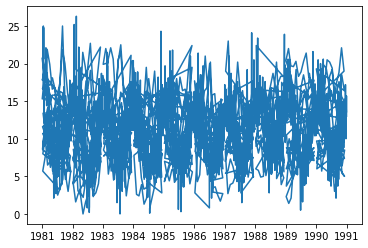

In [9]:
plt.plot(dataset['Date'],dataset['Temp'])

In [10]:
dataset['M12']=dataset['Temp'].rolling(12).mean()

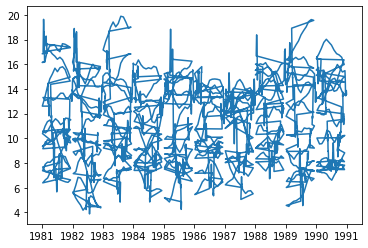

In [11]:
plt.plot(dataset['Date'],dataset['M12'])

In [12]:
#Extract month, year from date
dataset['Month']=[i.month for i in dataset['Date']]

In [14]:
dataset['Month']

0        1
1        2
2        3
3        4
4        5
        ..
3645    12
3646    12
3647    12
3648    12
3649    12
Name: Month, Length: 3650, dtype: int64

In [13]:
dataset['Year']=[i.year for i in dataset['Date']]

In [15]:
dataset['Year']

0       1981
1       1981
2       1981
3       1981
4       1981
        ... 
3645    1990
3646    1990
3647    1990
3648    1990
3649    1990
Name: Year, Length: 3650, dtype: int64

In [16]:
dataset['Series']=np.arange(1,len(dataset)+1)

In [17]:
dataset.drop(['Date','M12'], axis=1, inplace=True)

In [18]:
dataset=dataset[['Series','Year','Month','Temp']]

In [19]:
dataset.head()

,Series,Year,Month,Temp
0,1,1981,1,20.7
1,2,1981,2,17.9
2,3,1981,3,18.8
3,4,1981,4,14.6
4,5,1981,5,15.8


In [20]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(X_test)

In [ ]:
plt.plot(X_train,y_train,color='pink')
plt.plot(X_train, model.predict(X_train), color='gray')

# Time Series Data with ARIMA Model

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [39]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
    

In [40]:
dataset=pd.read_csv('D:/Test/Shampoo.csv',header=0, parse_dates=True,index_col='Month')
dataset

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


In [41]:
dataset=dataset.dropna()

In [42]:
dataset.shape

(36, 1)

<AxesSubplot:xlabel='Month'>

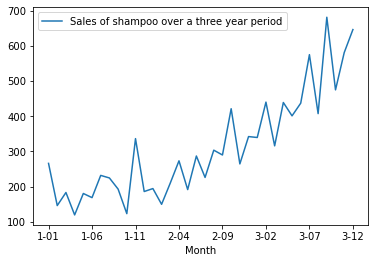

In [43]:
dataset.plot()

In [44]:
X=dataset.values

In [45]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [46]:
size=int(len(X) * 0.70)
print(len(X))
print(size)

36
25


In [47]:
train, test = X[0:size],X[size:len(X)]

In [48]:
train

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7]])

In [49]:
test

array([[440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [52]:
history =[x for x in train]
predictions =list()
for t in range(len(test)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    y_pred=output[0]
    predictions.append(y_pred)
    obs=test[t]
    history.append(obs)
    print(f'Predicted={y_pred},Expected={obs}')
error=mean_squared_error(test, predictions)
print(f"MSE = {error}")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicted=[387.37635503],Expected=[440.4]
Predicted=[348.15422407],Expected=[315.9]
Predicted=[386.30873564],Expected=[439.3]
Predicted=[356.08213522],Expected=[401.3]
Predicted=[446.37949922],Expected=[437.4]
Predicted=[394.73731958],Expected=[575.5]
Predicted=[434.9155186],Expected=[407.6]
Predicted=[507.92333692],Expected=[682.]
Predicted=[435.48297593],Expected=[475.3]
Predicted=[652.74379393],Expected=[581.3]
Predicted=[546.34341033],Expected=[646.9]
MSE = 8119.128212443171


In [53]:
history

[array([266.]),
 array([145.9]),
 array([183.1]),
 array([119.3]),
 array([180.3]),
 array([168.5]),
 array([231.8]),
 array([224.5]),
 array([192.8]),
 array([122.9]),
 array([336.5]),
 array([185.9]),
 array([194.3]),
 array([149.5]),
 array([210.1]),
 array([273.3]),
 array([191.4]),
 array([287.]),
 array([226.]),
 array([303.6]),
 array([289.9]),
 array([421.6]),
 array([264.5]),
 array([342.3]),
 array([339.7]),
 array([440.4]),
 array([315.9]),
 array([439.3]),
 array([401.3]),
 array([437.4]),
 array([575.5]),
 array([407.6]),
 array([682.]),
 array([475.3]),
 array([581.3]),
 array([646.9])]

In [54]:
output[0]

array([546.34341033])

In [55]:
obs

array([646.9])

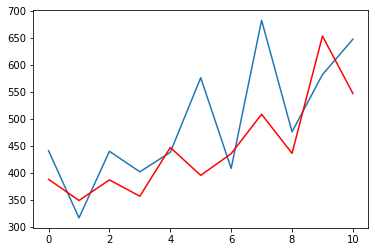

In [58]:
plt.plot(test)
plt.plot(predictions, color='red')